## Understanding Digital Images with Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
img_pil=Image.open("catimg.jpeg")
print(f"PIL Image fromat:{img_pil.format},size:{img_pil.size},mode:{img_pil.mode}")

PIL Image fromat:JPEG,size:(275, 183),mode:RGB


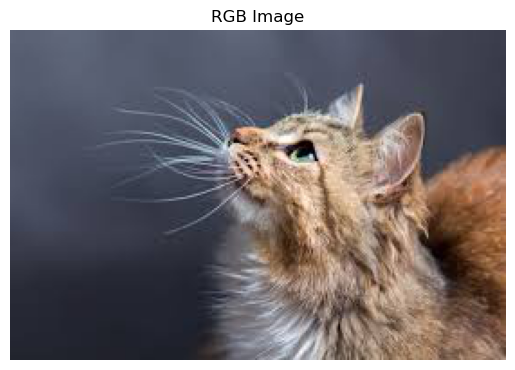

In [4]:
plt.imshow(img_pil)
plt.title('RGB Image')
plt.axis('off') #Hide axes for cleaner display
plt.show()

### Load and View a Grayscale Image

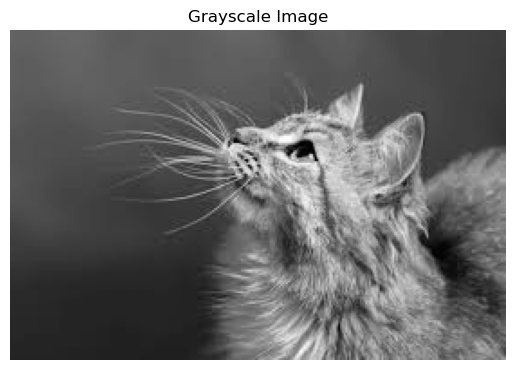

Shape: (183, 275)
Data type: uint8
Pixel range: 1 to 254


In [8]:
# Convert to grayscale
gray_img = img_pil.convert('L')
gray_array = np.array(gray_img)

# Display grayscale image
plt.imshow(gray_array, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# Inspect grayscale image array
print("Shape:", gray_array.shape)
print("Data type:", gray_array.dtype)
print("Pixel range:", gray_array.min(), "to", gray_array.max())

### Brighten the Image (+50)

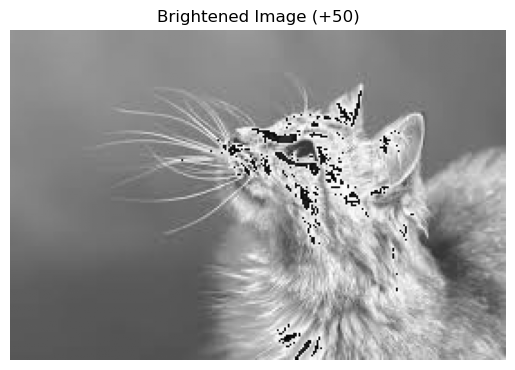

Max pixel value after brightening: 255


In [11]:
# Load and convert image to grayscale
img_pil = Image.open("catimg.jpeg")
gray_img = img_pil.convert('L')
gray_array = np.array(gray_img)

# Brighten the image by adding 50
bright_img = gray_array + 50  # This may overflow beyond 255
bright_img = np.clip(bright_img, 0, 255)  # Optional: Clip to avoid overflow
bright_img = bright_img.astype(np.uint8)  # Convert to correct data type for display

# Display the brightened image
plt.imshow(bright_img, cmap='gray')
plt.title('Brightened Image (+50)')
plt.axis('off')
plt.show()

# Inspect changes
print("Max pixel value after brightening:", bright_img.max())

### Add a Higher Value (+300) & Use Clipping

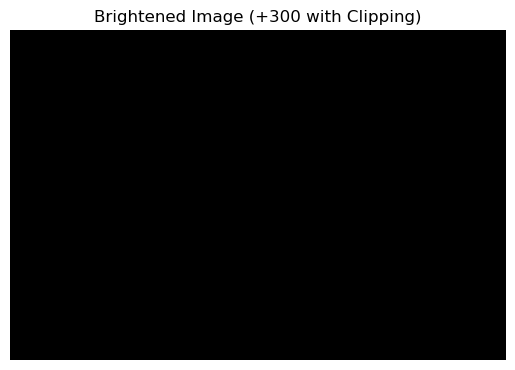

Max pixel value after clipping: 255


In [14]:
# Convert to a higher-bit depth BEFORE math
gray_array_int = gray_array.astype(np.int32)

# Add 300 (safe now)
too_bright = gray_array_int + 300

# Clip to valid pixel range
clipped = np.clip(too_bright, 0, 255).astype(np.uint8)

# Display the result
plt.imshow(clipped, cmap='gray')
plt.title('Brightened Image (+300 with Clipping)')
plt.axis('off')
plt.show()

print("Max pixel value after clipping:", clipped.max())

### Subtract to Darken (-100) & Use Clipping

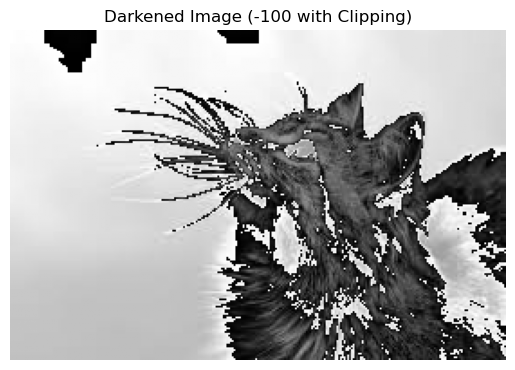

Min pixel value after clipping: 0


In [15]:
# Subtract 100 from the image
dark_img = gray_array - 100  # May go below 0
clipped_dark = np.clip(dark_img, 0, 255).astype(np.uint8)

# Display darkened image
plt.imshow(clipped_dark, cmap='gray')
plt.title('Darkened Image (-100 with Clipping)')
plt.axis('off')
plt.show()

# Check min value
print("Min pixel value after clipping:", clipped_dark.min())

### Transpose the Image

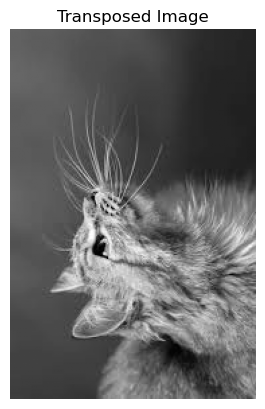

In [16]:
# Transpose the image (swap rows and columns)
transposed = gray_array.T

# Display transposed image
plt.imshow(transposed, cmap='gray')
plt.title('Transposed Image')
plt.axis('off')
plt.show()

### Flip the Image Horizontally and Vertically

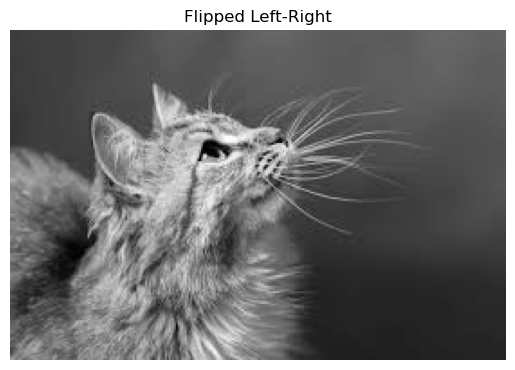

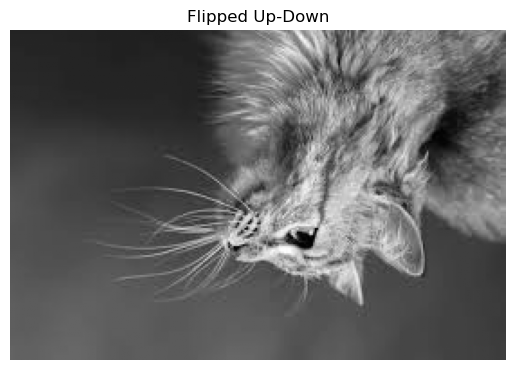

In [17]:
# Flip left to right
flipped_lr = np.fliplr(gray_array)

plt.imshow(flipped_lr, cmap='gray')
plt.title('Flipped Left-Right')
plt.axis('off')
plt.show()

# Flip up to down
flipped_ud = np.flipud(gray_array)

plt.imshow(flipped_ud, cmap='gray')
plt.title('Flipped Up-Down')
plt.axis('off')
plt.show()

### Slice (Crop) a Section of the Image

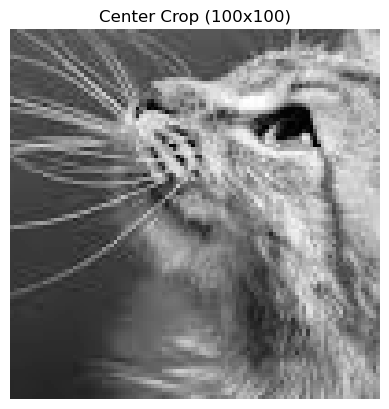

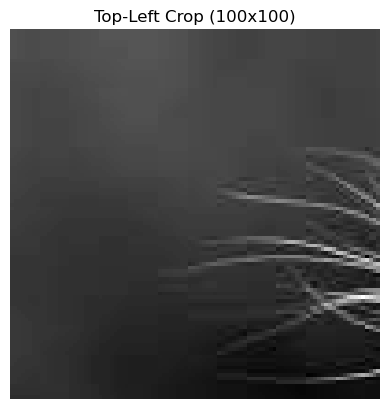

In [18]:
# Get dimensions
h, w = gray_array.shape

# Crop center 100x100
center_crop = gray_array[h//2 - 50:h//2 + 50, w//2 - 50:w//2 + 50]
plt.imshow(center_crop, cmap='gray')
plt.title('Center Crop (100x100)')
plt.axis('off')
plt.show()

# Crop top-left 100x100
top_left_crop = gray_array[0:100, 0:100]
plt.imshow(top_left_crop, cmap='gray')
plt.title('Top-Left Crop (100x100)')
plt.axis('off')
plt.show()

### Create a Negative Image

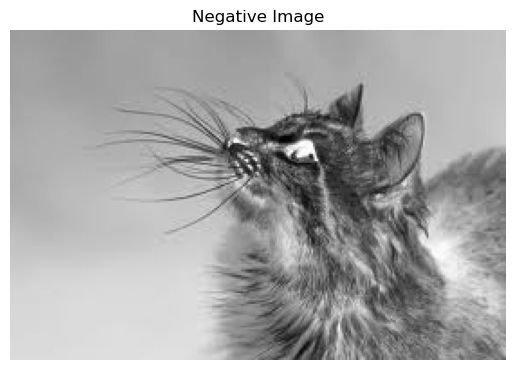

In [19]:
# Invert the image
negative_img = 255 - gray_array

# Display negative
plt.imshow(negative_img, cmap='gray')
plt.title('Negative Image')
plt.axis('off')
plt.show()

### Rotate the Image

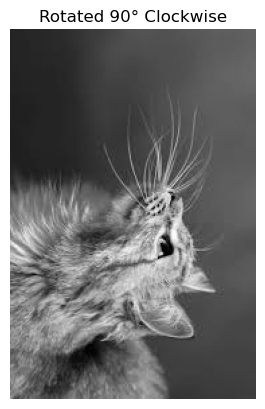

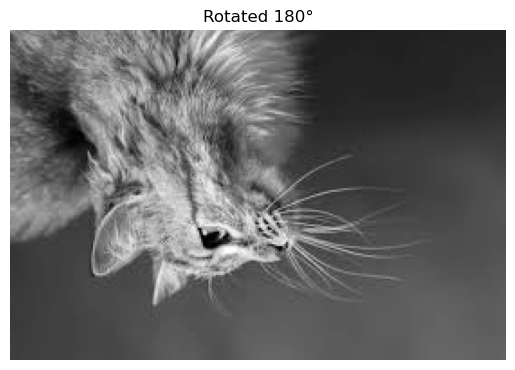

In [20]:
# Rotate 90° clockwise
rot90 = np.rot90(gray_array, k=-1)
plt.imshow(rot90, cmap='gray')
plt.title('Rotated 90° Clockwise')
plt.axis('off')
plt.show()

# Rotate 180°
rot180 = np.rot90(gray_array, k=2)
plt.imshow(rot180, cmap='gray')
plt.title('Rotated 180°')
plt.axis('off')
plt.show()

### Combine Multiple Transformations

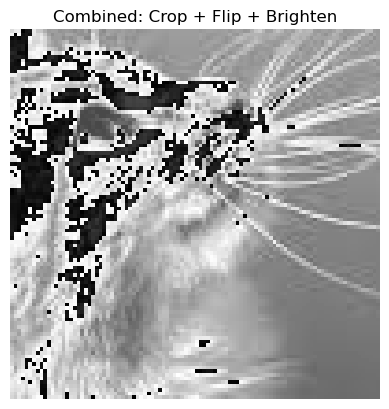

In [21]:
# Step 1: Crop center
center_crop = gray_array[h//2 - 50:h//2 + 50, w//2 - 50:w//2 + 50]

# Step 2: Flip horizontally
flipped_crop = np.fliplr(center_crop)

# Step 3: Brighten
bright_flipped_crop = np.clip(flipped_crop + 70, 0, 255).astype(np.uint8)

# Show final transformed image
plt.imshow(bright_flipped_crop, cmap='gray')
plt.title('Combined: Crop + Flip + Brighten')
plt.axis('off')
plt.show()